## Author :Megha sharma


### Data Set Problems 
This dataset contains information about drug classification based on patient general information and its diagnosis. Machine learning model is needed in order **to predict the outcome of the drugs type** that might be suitable for the patient.


### Objectives of Notebook

 Dataset exploration using various types of data visualization.
 Build various ML models that can predict drug type.

The machine learning models used in this project are
1. Linear Logistic Regression
2. Linear Support Vector Machine (SVM)
3. K Neighbours
4. Naive Bayes (Categorical & Gaussian)
5. Decision Tree
6. Random Forest


### Data Set Description
There are 6 variables in this data set:
4 categorical variables,and 2 continuous variables.


The following is the structure of the data set


<table style="width:100%">
<thead>
<tr>
<th style="text-align:center; font-weight: bold; font-size:14px">Variable Name</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Description</th>
<th style="text-align:center; font-weight: bold; font-size:14px">Sample Data</th>
</tr>
</thead>
<tbody>
<tr>
<td><b>Age</b></td>
<td>Patient Age</td>
<td>23; 47; ...</td>
</tr>
<tr>
<td><b>Sex</b></td>
<td>Gender of patient <br> (male or female)</td>
<td>F; M; ...</td>
</tr>
<tr>
<td><b>BP</b></td>
<td>Levels of blood pressure <br> (high, normal, or low)</td>
<td>HIGH; NORMAL; LOW; ...</td>
</tr>
<tr>
<td><b>Cholesterol</b></td>
<td>Levels of cholesterol <br> (high or normal)</td>
<td>1.4; 1.3; ...</td>
</tr>
<tr>
<td><b>Na_to_K</b></td>
<td>Sodium to potassium ratio in blood</td>
<td>25.355; 13.093; ...</td>
</tr>
<tr>
<td><b>Drug</b></td>
<td>Type of drug</td>
<td>DrugY; drugC; ...</td>
</tr>
</tbody>
</table>


### 2. Importing Libraries
Importing libraries that will be used in this notebook.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

### 3. Reading Data Set
After importing libraries, we will also import the dataset that will be used.

In [3]:
df = pd.read_csv("E:/vu post grad/sem4/TCS 210/drug.csv")


Read the first 6 rows in the dataset.

In [4]:
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


Data type and checking null in dataset.

In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB
None


### Dropping duplicates

From the results above,there are no missing/null value in this dataset

In [6]:
# check duplicated data
print(f"Number of dublicated: {df.duplicated().sum()}")

Number of dublicated: 0


In [7]:
df = df.drop_duplicates()

### 4. EDA
This section will explore raw dataset that has been imported.

### 4.1 Categorical Variables

In [8]:
# Number of unique values in each categorical data:
categorical = df.select_dtypes(['object'])
for var in categorical:
    print(f"{var} contains {df[var].nunique()} labels")
    print(df[var].value_counts())
    print('-'*30)

Sex contains 2 labels
M    104
F     96
Name: Sex, dtype: int64
------------------------------
BP contains 3 labels
HIGH      77
LOW       64
NORMAL    59
Name: BP, dtype: int64
------------------------------
Cholesterol contains 2 labels
HIGH      103
NORMAL     97
Name: Cholesterol, dtype: int64
------------------------------
Drug contains 5 labels
DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64
------------------------------


It can be seen that from results above, DrugY has more amount than other types of drugs

The distribution of patient gender,blood pressure level and cholesterol level is balanced.

### 4.2 Numerical Variable
This section will show mean, count, std, min, max and others using describe function. The skewness value for each numerical variables will also shown in this section.


There are 4 categorical feature including Sex, BP, Cholesterol, Drug_Type
There are to numerical feature including Na_to_k, Age

In [60]:
# Number of unique values in each categorical data:
categorical = df.select_dtypes(['int64','float64'])
for var in categorical:
    print(f"{var} contains {df[var].nunique()} labels")
    print(df[var].value_counts())
    print('-'*30)

In [10]:
df.describe()

,Age,Na_to_K
count,200.000000,200.000000
mean,44.315000,16.084485
std,16.544315,7.223956
min,15.000000,6.269000
25%,31.000000,10.445500
50%,45.000000,13.936500
75%,58.000000,19.380000
max,74.000000,38.247000


In [11]:
skewAge = df.Age.skew(axis = 0, skipna = True)
print('Age skewness: ', skewAge)

Age skewness:  0.03030835703000607


In [12]:
skewNatoK = df.Na_to_K.skew(axis = 0, skipna = True)
print('Na to K skewness: ', skewNatoK)

Na to K skewness:  1.039341186028881


C:\Users\hp\AppData\Local\Temp\ipykernel_9260\3157921379.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Age']);


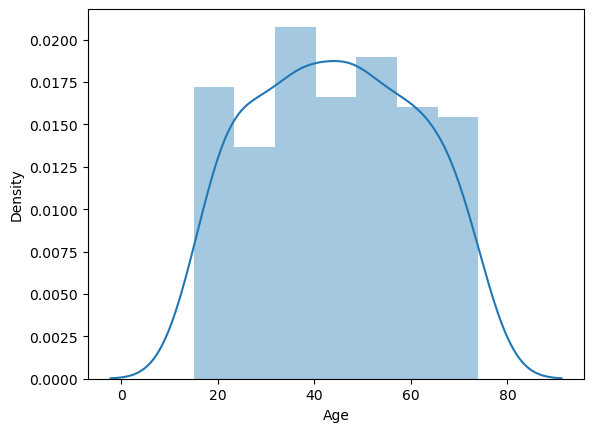

In [13]:
sns.distplot(df['Age']);

C:\Users\hp\AppData\Local\Temp\ipykernel_9260\3918593214.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Na_to_K']);


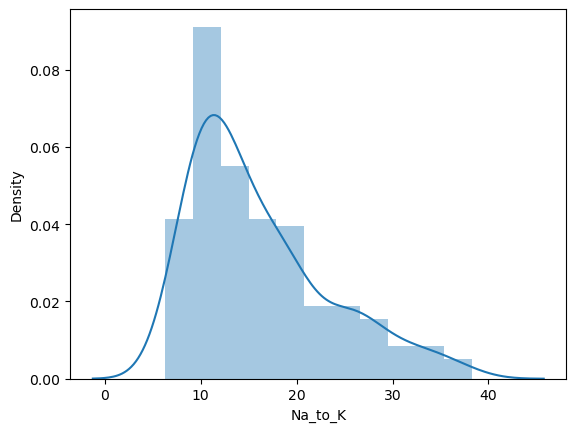

In [14]:
sns.distplot(df['Na_to_K']);

The distribution of **'Age'** column is **symetric**, since the skewness value  between -0.5 and 0.5 <br>
The distribution of **'Na_to_K'** column is **moderately skewed**, since the skewness value is ***between 0.5 and 1***. It can also be seen from the histogram for 'Na_to_K' column

In [15]:
df.columns

Index(['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug'], dtype='object')

### 5. EDA
This section will explore variables in the dataset using different various plots/charts.

### 5.1 Drug Type Distribution

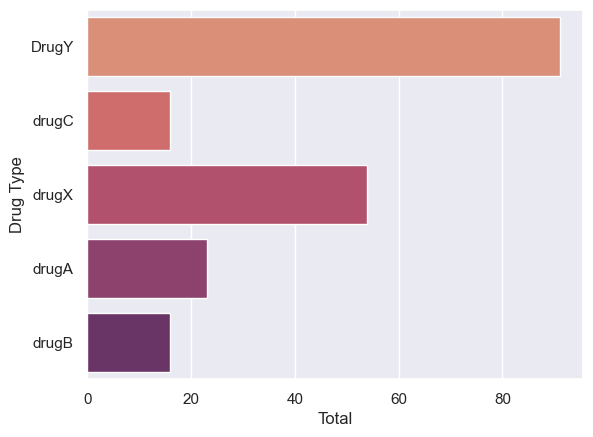

In [16]:
sns.set_theme(style="darkgrid")
sns.countplot(y="Drug", data=df, palette="flare")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

### 5.2 Gender Distribution 

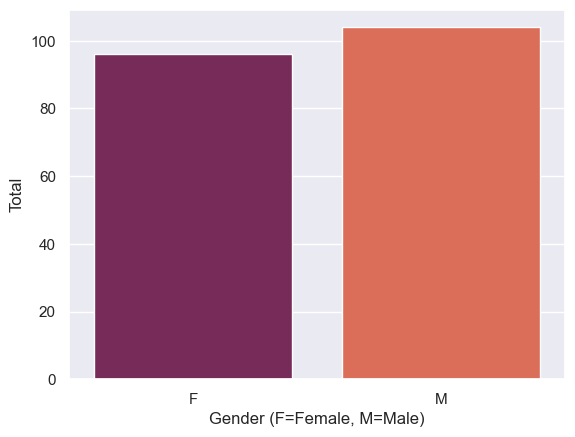

In [17]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Sex", data=df, palette="rocket")
plt.xlabel('Gender (F=Female, M=Male)')
plt.ylabel('Total')
plt.show()

### 5.3 Blood Pressure Distribution

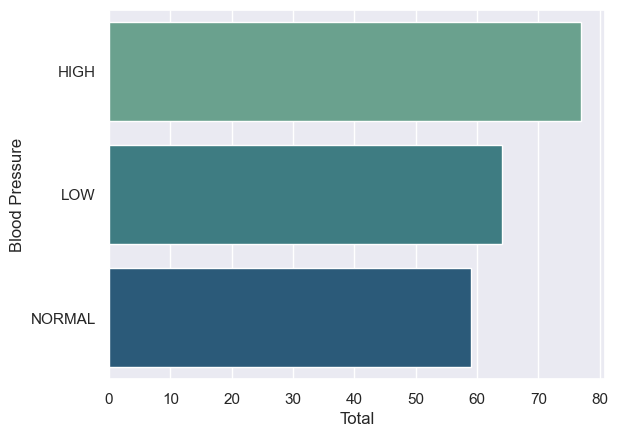

In [18]:
sns.set_theme(style="darkgrid")
sns.countplot(y="BP", data=df, palette="crest")
plt.ylabel('Blood Pressure')
plt.xlabel('Total')
plt.show()

### 5.4 Cholesterol Distribution

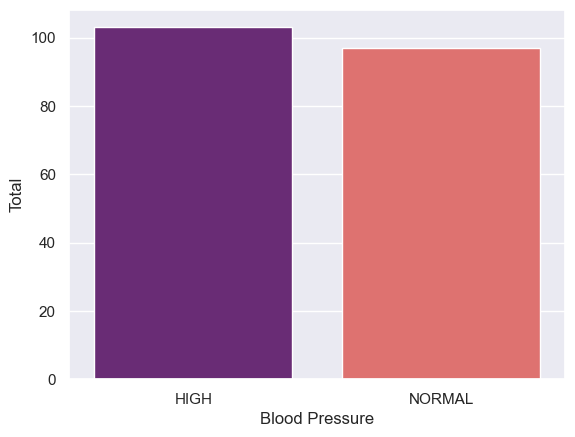

In [19]:
sns.set_theme(style="darkgrid")
sns.countplot(x="Cholesterol", data=df, palette="magma")
plt.xlabel('Blood Pressure')
plt.ylabel('Total')
plt.show()

### 5.5 Gender Distribution based on Drug Type 

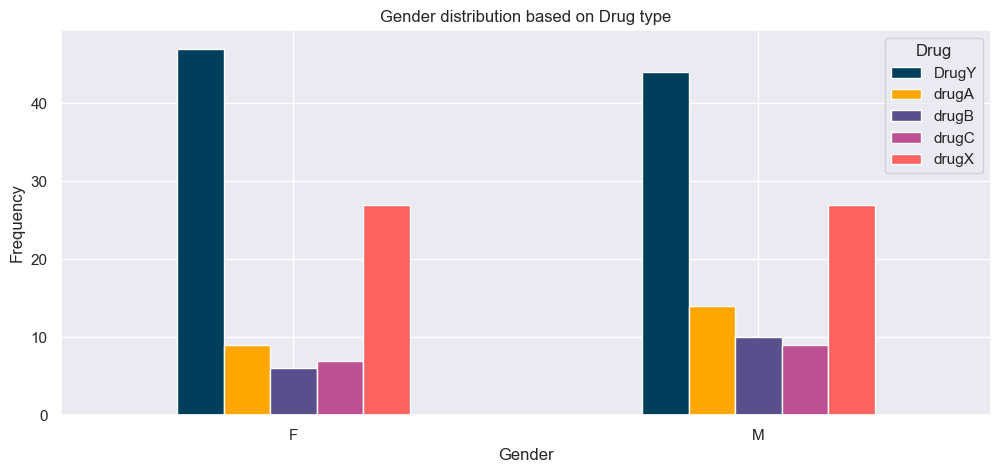

In [20]:
pd.crosstab(df.Sex,df.Drug).plot(kind="bar",figsize=(12,5),color=['#003f5c','#ffa600','#58508d','#bc5090','#ff6361'])
plt.title('Gender distribution based on Drug type')
plt.xlabel('Gender')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

### 5.6 Blood Pressure Distribution based on Cholesetrol

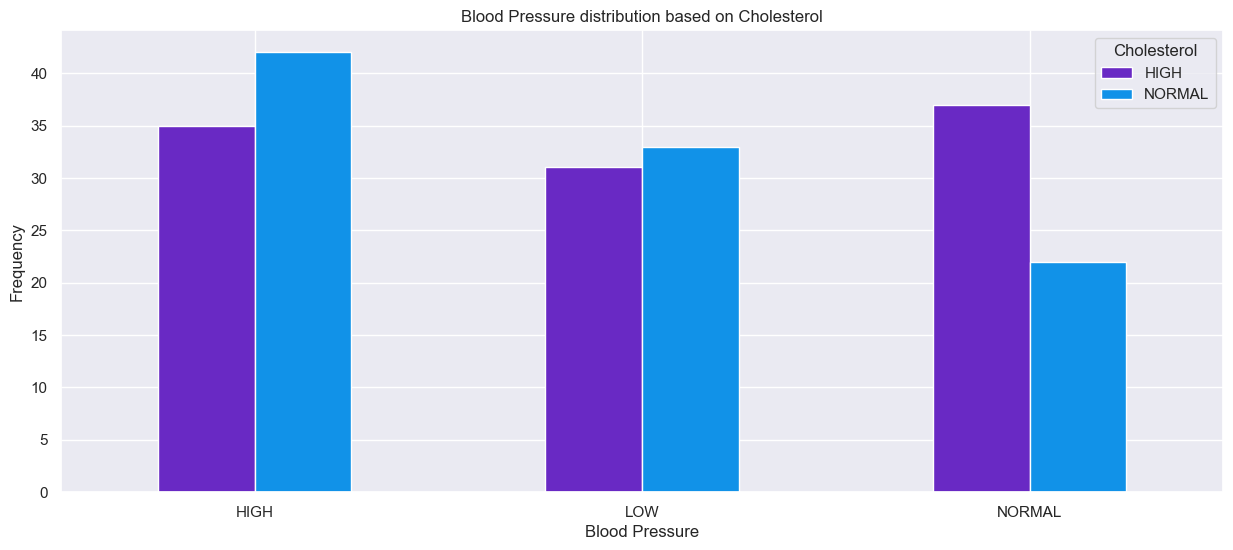

In [21]:
pd.crosstab(df.BP,df.Cholesterol).plot(kind="bar",figsize=(15,6),color=['#6929c4','#1192e8'])
plt.title('Blood Pressure distribution based on Cholesterol')
plt.xlabel('Blood Pressure')
plt.xticks(rotation=0)
plt.ylabel('Frequency')
plt.show()

### 5.7 Sodium to Potassium Distribution based on Gender and Age

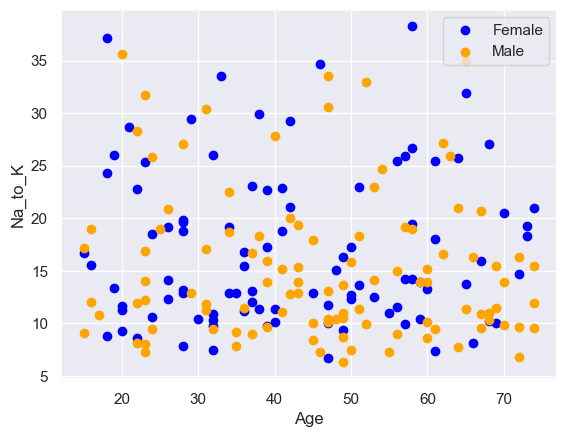

In [22]:
plt.scatter(x=df.Age[df.Sex=='F'], y=df.Na_to_K[(df.Sex=='F')], c="Blue")
plt.scatter(x=df.Age[df.Sex=='M'], y=df.Na_to_K[(df.Sex=='M')], c="Orange")
plt.legend(["Female", "Male"])
plt.xlabel("Age")
plt.ylabel("Na_to_K")
plt.show()

### 5.8 Count of Sex,BP ,cholestrol based on drug

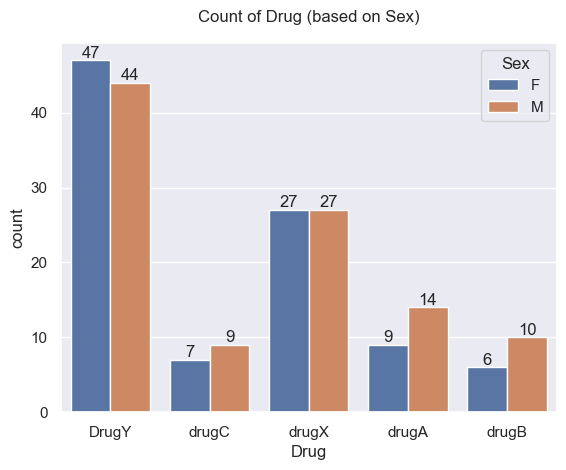

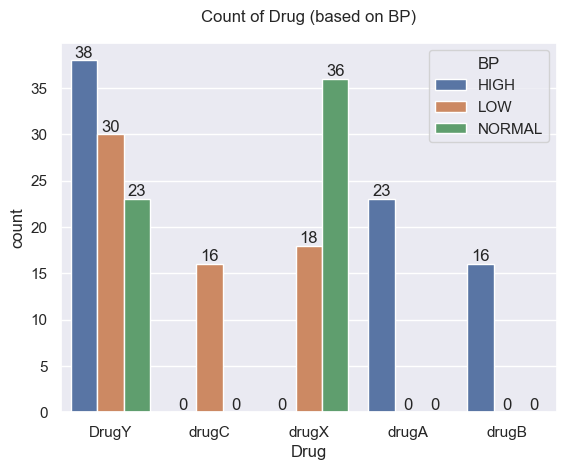

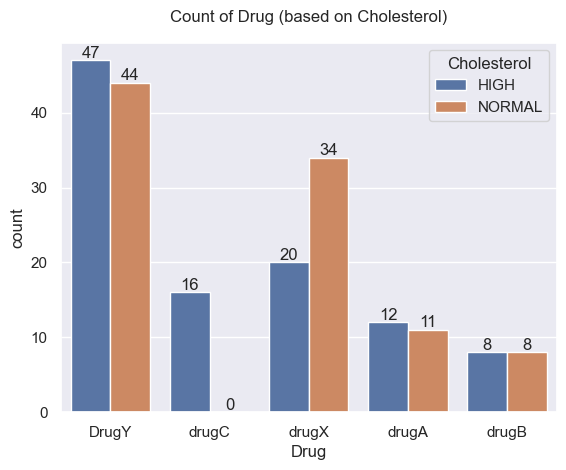

In [23]:

#### count of purchased based on Gender
%matplotlib inline
for col in ['Sex','BP','Cholesterol']:
    ax = sns.countplot(data=df, x='Drug', hue=col)
    for container in ax.containers:
        ax.bar_label(container)
    plt.title(f'Count of Drug (based on {col})', pad=15)
    plt.show()

### 5.9 Count of Sex,BP ,cholestrol based on drug

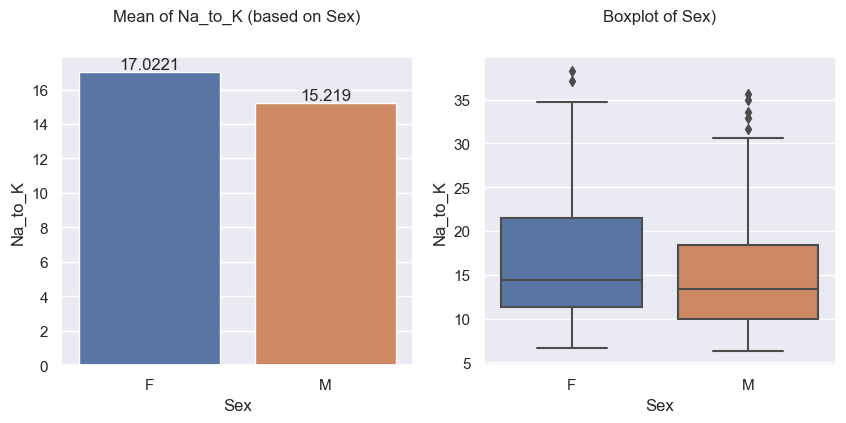

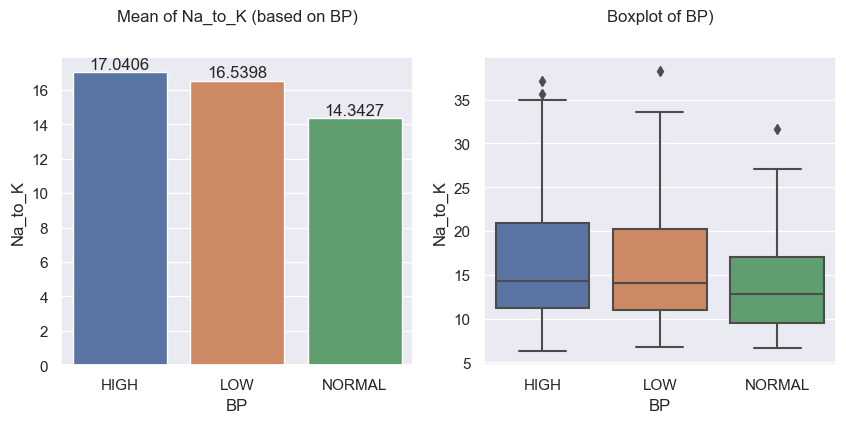

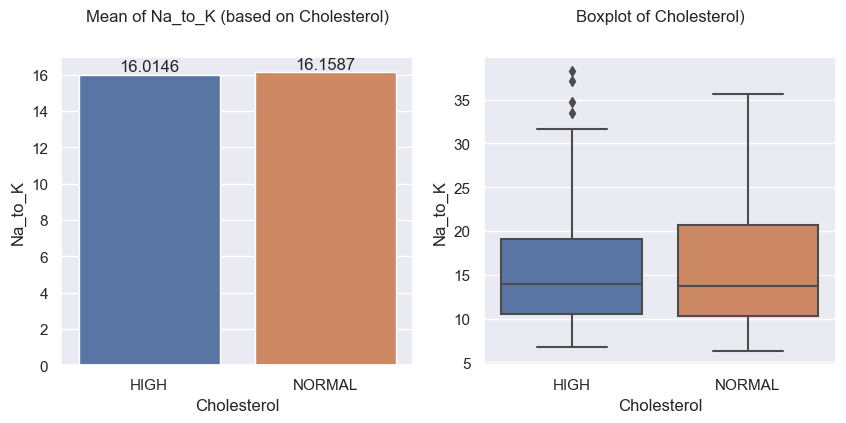

In [24]:
# Mean of Age and Na_to_K based on each feature
for col in ['Sex', 'BP', 'Cholesterol']:
    fig , ax= plt.subplots(1,2, figsize=(10,4))
    gp = df.groupby([col])['Na_to_K'].mean().to_frame().reset_index()
    sns.barplot(data=gp, x=col, y='Na_to_K', ax=ax[0])
    for container in ax[0].containers:
        ax[0].bar_label(container)
    ax[0].set_title(f'Mean of Na_to_K (based on {col})', y=1.09)

    sns.boxplot(data=df, x=col, y='Na_to_K', ax=ax[1])
    ax[1].set_title(f'Boxplot of {col})', y=1.09)

    plt.show()

According to above plots:

A, B, and C drugs are mostly prescribed for male.

Drug X is equally prescribed for male and female.

Y drug is mostly prescribed for female.

The people who were prescribed drug B all had HIGH BP, and the people who were prescribed drug C all had LOW BP.

For people who had normal BP, only one of X or Y drugs was prescribed.

A and B drugs have not been prescribed for any of the people with LOW BP.

X and C drugs have not been prescribed for any of the people with HIGH BP.

Drug C has not been prescribed for any of the people who have HIGH Cholesterol.

People with higher BP have a higher Na_to_K ratio on average. As a result, it seems that these two features have a relative correlation.

The age range in the dataset is between 15 and 74 years and most of them are middle-aged.

The Na_to_K rate of the people in the dataset is 16 on average.

Number of male and female is not much different. The number of men is slightly more.

The number of people with HIGH BP is more than the number of people with low or NORMAL BP.

The number of people with HIGH Cholesterol and people with NORMAL Cholesterol is not much differnt.

The most prescribed drugs are drugs y and x, respectively. Also, drugs B and C have the lowest amount of prescription.


### 5.10 scatter plot for numerics feature (Age and Na_to_K)

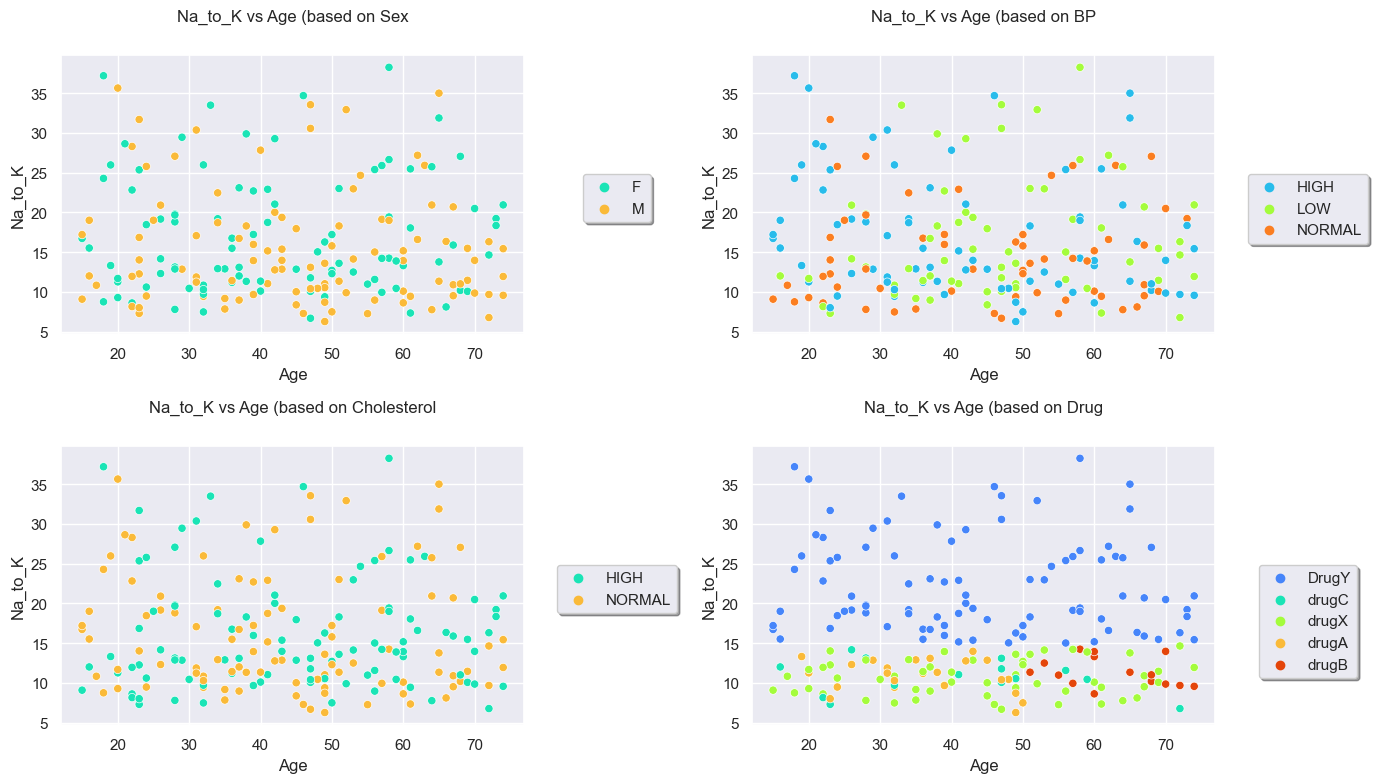

In [25]:
# use scatter plot for numerics feature (Age and Na_to_K)
fig, ax = plt.subplots(2,2,figsize=(14,8))
for i, col in enumerate(['Sex', 'BP', 'Cholesterol', 'Drug']):
    sns.scatterplot(data=df, x='Age', y='Na_to_K', hue=col, ax=ax[i//2, i%2], palette='turbo')
    ax[i//2, i%2].set_title(f'Na_to_K vs Age (based on {col}', y=1.09)
    ax[i//2, i%2].legend(loc='upper center', bbox_to_anchor=(1.2, 0.6),
        fancybox=True, shadow=True)

fig.tight_layout() 
plt.show()

### 5.11 swarm plots

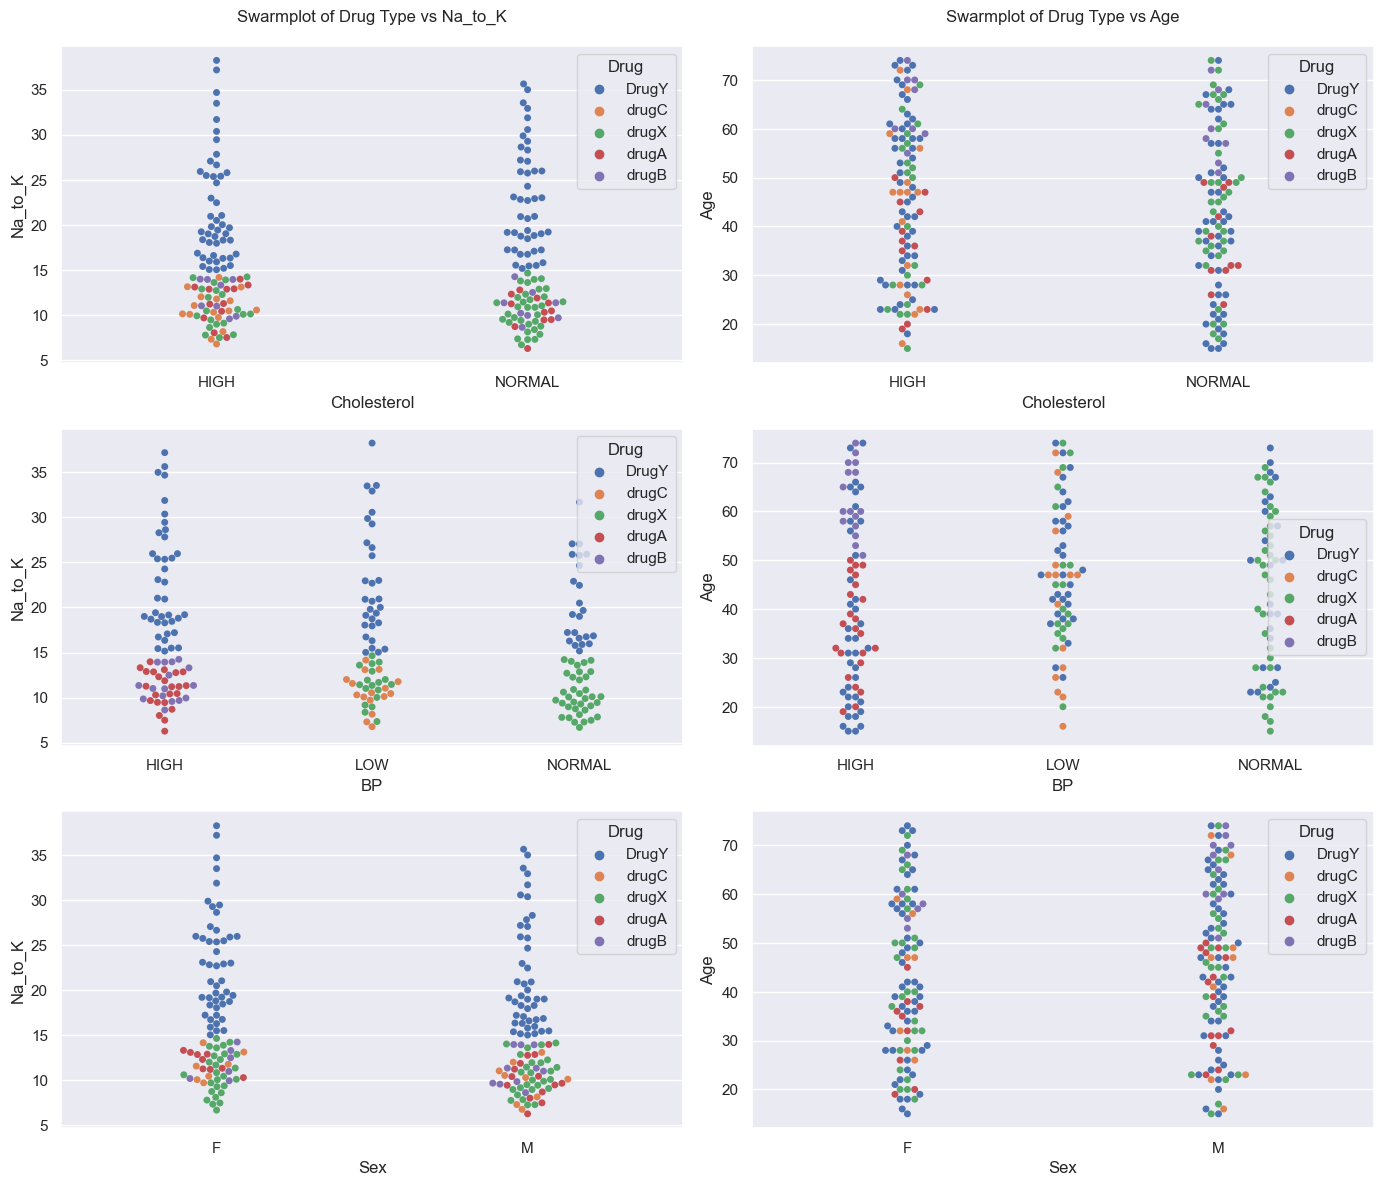

In [26]:
fig, ax = plt.subplots(3,2,figsize=(14,12))
sns.swarmplot(data=df, x='Cholesterol', y='Na_to_K', hue='Drug', ax=ax[0,0])
sns.swarmplot(data=df, x='Cholesterol', y='Age', hue='Drug', ax=ax[0,1])
sns.swarmplot(data=df, x='BP', y='Na_to_K', hue='Drug', ax=ax[1,0])
sns.swarmplot(data=df, x='BP', y='Age', hue='Drug', ax=ax[1,1])
sns.swarmplot(data=df, x='Sex', y='Na_to_K', hue='Drug', ax=ax[2,0])
sns.swarmplot(data=df, x='Sex', y='Age', hue='Drug', ax=ax[2,1])
ax[0,0].set_title('Swarmplot of Drug Type vs Na_to_K',y=1.05)
ax[0,1].set_title('Swarmplot of Drug Type vs Age',y=1.05)
plt.tight_layout()
plt.show()

According to above plots:

For the Na_to_K rate more than 15, only drug Y is prescribed.
Drug X is prescribed for peaple with a Na_to_K rate less than 15 and by LOW or NORMAL level of and BP.

Drug C is prescribed for peaple with a Na_to_k rate less than 15 and by HIGH Cholesterol and LOW BP

Drug B is prescribed only for people over 50 years old with a Na_to_K rate of less than 15 by HIGH BP.

Drug A is prescribed only for people under 50 years old with a Na_to_K rate of less than 15 by HIGH BP.

A, B, and C drugs are mostly prescribed for male.

Drug X is equally prescribed for male and female.

Y drug is mostly prescribed for female.

The people who were prescribed drug B all had HIGH BP, and the people who were prescribed drug C all had LOW BP.

For people who had normal BP, only one of X or Y drugs was prescribed.

A and B drugs have not been prescribed for any of the people with LOW BP.

X and C drugs have not been prescribed for any of the people with HIGH BP.

Drug C has not been prescribed for any of the people who have HIGH Cholesterol.

People with higher BP have a higher Na_to_K ratio on average. As a result, it seems that these two features have a relative correlation.

### 6. Dataset Preparation
This section will prepare the dataset before building the machine learning models.

### 6.1 Data Binning

### 6.1.1 Age
The age will be divided into **7 age categories**:
*  Below 20 y.o.
*  20 - 29 y.o.
*  30 - 39 y.o.
*  40 - 49 y.o.
*  50 - 59 y.o.
*  60 - 69 y.o.
*  Above 70.

In [27]:
bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
df['Age_binned'] = pd.cut(df['Age'], bins=bin_age, labels=category_age)
df = df.drop(['Age'], axis = 1)

### 6.1.2 Na_to_K 🧪
👉 The chemical ratio will be divided into **4 categories**:
*  Below 10.
*  10 - 20.
*  20 - 30.
*  Above 30.

In [28]:
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
df['Na_to_K_binned'] = pd.cut(df['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
df = df.drop(['Na_to_K'], axis = 1)

We can see here that the minimum and maximum ages are 15 and 74 respectively and the minimum and maximum sodium to potassium ratios are 6.269 and 38.247 respectively.

Transforming categorical variables into a form that could be provided to ML algorithms to do a better prediction

### 6.2 Splitting the dataset
The dataset will be split into **70% training and 30% testing**.

In [29]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [30]:
X = df.drop(["Drug"], axis=1)
y = df["Drug"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

### 6.3 Feature Engineering
The FE method that used is **one-hot encoding**, which is **transforming categorical variables into a form that could be provided to ML algorithms to do a better prediction**.

In [31]:
X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)

In [32]:
X_train.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
71,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0
124,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
184,1,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1
97,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0
149,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0


In [33]:
X_test.head()

,Sex_F,Sex_M,BP_HIGH,BP_LOW,BP_NORMAL,Cholesterol_HIGH,Cholesterol_NORMAL,Age_binned_<20s,Age_binned_20s,Age_binned_30s,Age_binned_40s,Age_binned_50s,Age_binned_60s,Age_binned_>60s,Na_to_K_binned_<10,Na_to_K_binned_10-20,Na_to_K_binned_20-30,Na_to_K_binned_>30
18,0,1,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0
170,1,0,0,0,1,1,0,0,1,0,0,0,0,0,0,1,0,0
107,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0
98,0,1,1,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1
177,0,1,0,0,1,1,0,0,1,0,0,0,0,0,0,0,1,0


### 6.4 SMOTE Technique

Since the number of 'DrugY' is more than other types of drugs, **oversampling is carried out to avoid overfitting**.

In [34]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_resample(X_train, y_train)

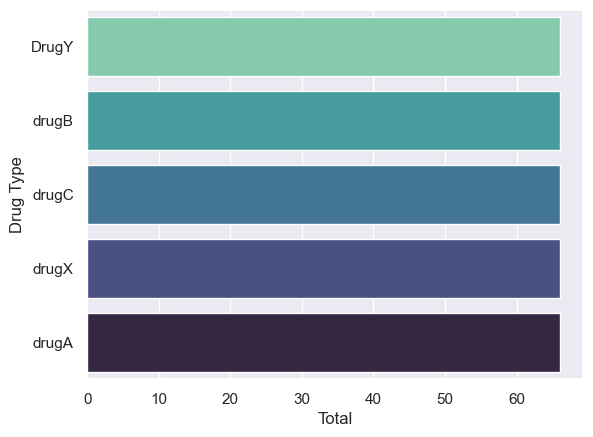

In [35]:
sns.set_theme(style="darkgrid")
sns.countplot(y=y_train, data=df, palette="mako_r")
plt.ylabel('Drug Type')
plt.xlabel('Total')
plt.show()

As can be seen, the distrubtion of drug type are now balanced.

### 7. Models

### 7.1 Logistic Regression

In [36]:
from sklearn.linear_model import LogisticRegression
LRclassifier = LogisticRegression(solver='liblinear', max_iter=5000)
LRclassifier.fit(X_train, y_train)

y_pred = LRclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
LRAcc = accuracy_score(y_pred,y_test)
print('Logistic Regression accuracy is: {:.2f}%'.format(LRAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.64      0.78        25
       drugA       0.71      1.00      0.83         5
       drugB       0.50      1.00      0.67         1
       drugC       0.60      1.00      0.75         3
       drugX       0.80      1.00      0.89        16

    accuracy                           0.82        50
   macro avg       0.72      0.93      0.78        50
weighted avg       0.87      0.82      0.82        50

[[16  2  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 16]]
Logistic Regression accuracy is: 82.00%


### 7.2 K Neighbours

In [37]:
from sklearn.neighbors import KNeighborsClassifier
KNclassifier = KNeighborsClassifier(n_neighbors=20)
KNclassifier.fit(X_train, y_train)

y_pred = KNclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
KNAcc = accuracy_score(y_pred,y_test)
print('K Neighbours accuracy is: {:.2f}%'.format(KNAcc*100))

              precision    recall  f1-score   support

       DrugY       0.93      0.52      0.67        25
       drugA       0.50      0.80      0.62         5
       drugB       0.33      1.00      0.50         1
       drugC       0.50      1.00      0.67         3
       drugX       0.79      0.94      0.86        16

    accuracy                           0.72        50
   macro avg       0.61      0.85      0.66        50
weighted avg       0.80      0.72      0.72        50

[[13  4  1  3  4]
 [ 0  4  1  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 1  0  0  0 15]]
K Neighbours accuracy is: 72.00%


### 7.3 Support Vector Machine (SVM)

In [38]:
from sklearn.svm import SVC
SVCclassifier = SVC(kernel='linear', max_iter=251)
SVCclassifier.fit(X_train, y_train)

y_pred = SVCclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
SVCAcc = accuracy_score(y_pred,y_test)
print('SVC accuracy is: {:.2f}%'.format(SVCAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.64      0.78        25
       drugA       0.71      1.00      0.83         5
       drugB       0.50      1.00      0.67         1
       drugC       0.60      1.00      0.75         3
       drugX       0.80      1.00      0.89        16

    accuracy                           0.82        50
   macro avg       0.72      0.93      0.78        50
weighted avg       0.87      0.82      0.82        50

[[16  2  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 16]]
SVC accuracy is: 82.00%


C:\Users\hp\anaconda3\lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=251).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


### 7.4 Naive Bayes
### 7.4.1 Categorical NB

In [39]:
from sklearn.naive_bayes import CategoricalNB
NBclassifier1 = CategoricalNB()
NBclassifier1.fit(X_train, y_train)

y_pred = NBclassifier1.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc1 = accuracy_score(y_pred,y_test)
print('Naive Bayes accuracy is: {:.2f}%'.format(NBAcc1*100))

              precision    recall  f1-score   support

       DrugY       0.89      0.64      0.74        25
       drugA       0.71      1.00      0.83         5
       drugB       0.50      1.00      0.67         1
       drugC       0.60      1.00      0.75         3
       drugX       0.78      0.88      0.82        16

    accuracy                           0.78        50
   macro avg       0.70      0.90      0.76        50
weighted avg       0.81      0.78      0.78        50

[[16  2  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 2  0  0  0 14]]
Naive Bayes accuracy is: 78.00%


### 7.4.2 Gaussian NB

In [40]:
from sklearn.naive_bayes import GaussianNB
NBclassifier2 = GaussianNB()
NBclassifier2.fit(X_train, y_train)

y_pred = NBclassifier2.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
NBAcc2 = accuracy_score(y_pred,y_test)
print('Gaussian Naive Bayes accuracy is: {:.2f}%'.format(NBAcc2*100))

              precision    recall  f1-score   support

       DrugY       0.63      0.88      0.73        25
       drugA       0.67      0.80      0.73         5
       drugB       0.50      1.00      0.67         1
       drugC       1.00      0.33      0.50         3
       drugX       1.00      0.38      0.55        16

    accuracy                           0.68        50
   macro avg       0.76      0.68      0.63        50
weighted avg       0.77      0.68      0.66        50

[[22  2  1  0  0]
 [ 1  4  0  0  0]
 [ 0  0  1  0  0]
 [ 2  0  0  1  0]
 [10  0  0  0  6]]
Gaussian Naive Bayes accuracy is: 68.00%


## 7.5 Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier
DTclassifier = DecisionTreeClassifier(max_leaf_nodes=20)
DTclassifier.fit(X_train, y_train)

y_pred = DTclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
DTAcc = accuracy_score(y_pred,y_test)
print('Decision Tree accuracy is: {:.2f}%'.format(DTAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.64      0.78        25
       drugA       0.71      1.00      0.83         5
       drugB       0.50      1.00      0.67         1
       drugC       0.60      1.00      0.75         3
       drugX       0.80      1.00      0.89        16

    accuracy                           0.82        50
   macro avg       0.72      0.93      0.78        50
weighted avg       0.87      0.82      0.82        50

[[16  2  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 16]]
Decision Tree accuracy is: 82.00%


## 7.6 Random Forest

In [42]:
from sklearn.ensemble import RandomForestClassifier

RFclassifier = RandomForestClassifier(max_leaf_nodes=30)
RFclassifier.fit(X_train, y_train)

y_pred = RFclassifier.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

from sklearn.metrics import accuracy_score
RFAcc = accuracy_score(y_pred,y_test)
print('Random Forest accuracy is: {:.2f}%'.format(RFAcc*100))

              precision    recall  f1-score   support

       DrugY       1.00      0.64      0.78        25
       drugA       0.71      1.00      0.83         5
       drugB       0.50      1.00      0.67         1
       drugC       0.60      1.00      0.75         3
       drugX       0.80      1.00      0.89        16

    accuracy                           0.82        50
   macro avg       0.72      0.93      0.78        50
weighted avg       0.87      0.82      0.82        50

[[16  2  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 16]]
Random Forest accuracy is: 82.00%


# 8. Model Comparison 👀

In [43]:
compare = pd.DataFrame({'Model': ['Logistic Regression', 'K Neighbors', 'SVM', 'Categorical NB', 'Gaussian NB', 'Decision Tree','Random Forest'], 
                        'Accuracy': [LRAcc*100, KNAcc*100,SVCAcc*100, NBAcc1*100, NBAcc2*100, DTAcc*100,RFAcc*100]})
compare.sort_values(by='Accuracy', ascending=False)

,Model,Accuracy
0,Logistic Regression,82.0
2,SVM,82.0
5,Decision Tree,82.0
6,Random Forest,82.0
3,Categorical NB,78.0
1,K Neighbors,72.0
4,Gaussian NB,68.0


From the results, it can be seen that most of ML models can reach **up to 80% accuracy** in predicting classification of drug type.

We have really 4 good models,so we will reject the other models and apply hyperparamter tuning only on random forest,SVM ,Logistic regression

## Choosing to opt for Grid search CV

### Hyperparameter Tuning for Random Forest:

In [44]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_leaf_nodes': [10, 20, 30, 40, 50],
    'n_estimators': [50, 100, 150, 200],
    # Add more hyperparameters to tune if desired
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters for Random Forest:", grid_search.best_params_)

best_RF_classifier = grid_search.best_estimator_


Best parameters for Random Forest: {'max_leaf_nodes': 30, 'n_estimators': 150}


### Hyperparameter Tuning for SVM:

In [45]:
param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf'],
    # Add more hyperparameters to tune if desired
}

grid_search = GridSearchCV(SVC(), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters for SVM:", grid_search.best_params_)

best_SVC_classifier = grid_search.best_estimator_


Best parameters for SVM: {'C': 1, 'kernel': 'linear'}


### Hyperparameter Tuning for Logistic Regression:

In [46]:
param_grid = {
    'C': [0.1, 1, 10],
    'solver': ['liblinear', 'lbfgs'],
    # Add more hyperparameters to tune if desired
}

grid_search = GridSearchCV(LogisticRegression(max_iter=5000), param_grid, cv=5)
grid_search.fit(X_train, y_train)

print("Best parameters for Logistic Regression:", grid_search.best_params_)

best_LR_classifier = grid_search.best_estimator_


Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}


To calculate the accuracy score, confusion matrix, and classification report after hyperparameter tuning, you can use the best estimators obtained from the hyperparameter tuning process.

## Random Forest

In [47]:
y_pred = best_RF_classifier.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print("Random Forest - Classification Report:")
print(classification_report(y_test, y_pred))

print("Random Forest - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

RF_acc = accuracy_score(y_test, y_pred)
print("Random Forest - Accuracy: {:.2f}%".format(RF_acc * 100))


Random Forest - Classification Report:
              precision    recall  f1-score   support

       DrugY       1.00      0.64      0.78        25
       drugA       0.71      1.00      0.83         5
       drugB       0.50      1.00      0.67         1
       drugC       0.60      1.00      0.75         3
       drugX       0.80      1.00      0.89        16

    accuracy                           0.82        50
   macro avg       0.72      0.93      0.78        50
weighted avg       0.87      0.82      0.82        50

Random Forest - Confusion Matrix:
[[16  2  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 16]]
Random Forest - Accuracy: 82.00%


## SVM

In [48]:
y_pred = best_SVC_classifier.predict(X_test)

print("SVM - Classification Report:")
print(classification_report(y_test, y_pred))

print("SVM - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

SVM_acc = accuracy_score(y_test, y_pred)
print("SVM - Accuracy: {:.2f}%".format(SVM_acc * 100))

SVM - Classification Report:
              precision    recall  f1-score   support

       DrugY       1.00      0.64      0.78        25
       drugA       0.71      1.00      0.83         5
       drugB       0.50      1.00      0.67         1
       drugC       0.60      1.00      0.75         3
       drugX       0.80      1.00      0.89        16

    accuracy                           0.82        50
   macro avg       0.72      0.93      0.78        50
weighted avg       0.87      0.82      0.82        50

SVM - Confusion Matrix:
[[16  2  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 16]]
SVM - Accuracy: 82.00%


## Logistic Regression:

In [49]:
y_pred = best_LR_classifier.predict(X_test)

print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred))

print("Logistic Regression - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

LR_acc = accuracy_score(y_test, y_pred)
print("Logistic Regression - Accuracy: {:.2f}%".format(LR_acc * 100))


Logistic Regression - Classification Report:
              precision    recall  f1-score   support

       DrugY       1.00      0.64      0.78        25
       drugA       0.71      1.00      0.83         5
       drugB       0.50      1.00      0.67         1
       drugC       0.60      1.00      0.75         3
       drugX       0.80      1.00      0.89        16

    accuracy                           0.82        50
   macro avg       0.72      0.93      0.78        50
weighted avg       0.87      0.82      0.82        50

Logistic Regression - Confusion Matrix:
[[16  2  1  2  4]
 [ 0  5  0  0  0]
 [ 0  0  1  0  0]
 [ 0  0  0  3  0]
 [ 0  0  0  0 16]]
Logistic Regression - Accuracy: 82.00%


## Example

In [59]:
# fit final model on all of data (train + test)
final_model = LogisticRegression(solver='liblinear', penalty='l2', C=10, multi_class='ovr', max_iter=10000)
final_model.fit(X_train, y_train.ravel())

# define sample data
sample = pd.DataFrame({'Age':[53], 'Sex':['M'], 'BP':['HIGH'], 'Cholesterol':['NORMAL'], 'Na_to_K':[16.5]})
print(f"Age: {sample['Age'].values[0]}\n"
      f"Sex: {sample['Sex'].values[0]}\n"
      f"BP: {sample['BP'].values[0]}\n"
      f"Cholesterol: {sample['Cholesterol'].values[0]}\n"
      f"Na_to_K: {sample['Na_to_K'].values[0]}")

# standardize and prepare sample data for predicting by final model
bin_NatoK = [0, 9, 19, 29, 50]
category_NatoK = ['<10', '10-20', '20-30', '>30']
sample['Na_to_K_binned'] = pd.cut(sample['Na_to_K'], bins=bin_NatoK, labels=category_NatoK)
sample = sample.drop(['Na_to_K'], axis=n_Na1)

bin_age = [0, 19, 29, 39, 49, 59, 69, 80]
category_age = ['<20s', '20s', '30s', '40s', '50s', '60s', '>60s']
sample['Age_binned'] = pd.cut(sample['Age'], bins=bin_age, labels=category_age)
sample = sample.drop(['Age'], axis=1)

sample = pd.get_dummies(sample)

# Get missing columns in the sample data and add them with default values of 0
missing_cols = set(X_train.columns) - set(sample.columns)
for col in missing_cols:
    sample[col] = 0

# Ensure the order of columns in the sample data matches the order in the trained model
sample = sample[X_train.columns]

# Predict sample data
result = final_model.predict(sample)
result = pd.DataFrame(result).replace([1, 2, 3, 4, 5], ['DrugY', 'drugX', 'drugA', 'drugC', 'drugB']).iloc[0, 0]
print('=' * 38)
print(f"Predicted drug is: {result}")


Age: 53
Sex: M
BP: HIGH
Cholesterol: NORMAL
Na_to_K: 16.5
Predicted drug is: drugB
